Nom:       Hmida
Prénom:    Mohamed Belhassen  
E-mail:    mohamed.belhassen.hmida@essai.ucar.tn  
Matricule:2300043       

# Projet de Programmation Mathématique

Vous devez remettre un rapport individuel au plus tard dimanche le 30 avril 2023 avant 23h59, dans Google Classroom, sous la forme d'un fichier électronique de format IPYNB, nommé ``NomPrenom.ipynb``. Le rapport doit contenir votre nom, prénom, matricule d'étudiant, et email institutionnel. Aucune remise papier ou par courriel ne sera acceptée. La note zéro sera attribuée à toute remise qui ne respecte pas les directives.   

Pour vos analyses, vous devez d'abord obtenir avec votre matricule d'étudiant un ensemble personnalisé de données. Toutes vos réponses doivent correspondre à votre ensemble de données.   

Chacune de vos réponses doit être complète, expliquée et justifiée. Lors de la correction, il sera tenu compte de la qualité de la présentation, la pertinence des analyses et l'initiative dont vous ferez preuve dans votre rapport. Sur les 20 points, 18 sont alloués aux analyses, commentaires pertinents, etc. et 2 à la présentation. Les analyses, les tableaux et les graphiques du rapport doivent être produits avec le logiciel ``Python``. Tout cas de plagiat sera sévèrement sanctionné, ainsi qu'une note 0 à ce devoir.


# Contribution de l'élève

# **Linear Prediction of Indian Monsoon Rainfall**
----------


# Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading and Preparation](#data-loading-and-preparation)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
4. [Feature Engineering](#feature-engineering)
5. [Model Development and Selection](#model-development-and-selection)
6. [Model Evaluation](#model-evaluation)
7. [References](#references)
8. [Appendix](#appendix)


## Introduction

The Indian monsoon is a critical weather system that has significant impacts on agriculture, water resources, and the broader economy. Accurate predictions of monsoon rainfall are essential for planning and decision-making in these areas. This analysis notebook explores a strategy for selecting the best linear prediction model for forecasting Indian monsoon rainfall.

In this notebook, we will:
- Discuss various linear modeling techniques and their applicability to monsoon rainfall prediction.
- Examine data sets that provide relevant information on Indian monsoon rainfall and related predictors.
- Propose a cross-validation strategy to select the best linear model for predicting monsoon rainfall.
- Evaluate the performance of different linear models and determine which approach yields the most accurate forecasts.

Our goal is to identify a linear model that balances accuracy and simplicity, enabling improved forecasting of Indian monsoon rainfall. By employing robust data analysis techniques and statistical methods, we aim to provide insights into effective linear model selection strategies.


#Data Loading and Preparation:

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
Inida_Rain_fall_data = pd.read_csv("/content/rainfall in india 1901-2015.csv")
NAO_data             = pd.read_csv("/content/nao_monthly.csv")
Nino_3_data          = pd.read_csv("/content/nino3.4_monthly.csv")

# Rainfall Dataset in India (1901-2015)

This dataset contains rainfall data for India from 1901 to 2015. It provides annual rainfall measurements along with rainfall statistics for each trimester (Jan-Apr, May-Aug, Sep-Dec). The data is segmented into various subdivisions representing different regions in India.

## Data Structure

The dataset includes the following fields:

- **Subdivision**: The geographical subdivision in India (e.g., Western India, Eastern India).
- **Year**: The year of the measurement.
- **Annual Rainfall**: The total rainfall in millimeters for the entire year.
- **Trimester Rainfall**:
  - **Jan-April**: Rainfall for the first four months.
  - **May-August**: Rainfall for the middle four months.
  - **Sep-December**: Rainfall for the last four months.


In [ ]:
df_0 = Inida_Rain_fall_data
df_0.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
df_0.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

# North Atlantic Oscillation (NAO) Dataset (1948-2023)

The North Atlantic Oscillation (NAO) is a key climate phenomenon that affects weather patterns in the North Atlantic region, impacting Europe and North America. This dataset contains monthly NAO index values from 1948 to 2023, providing insights into long-term oscillation trends.

## Dataset Structure

The dataset consists of the following fields:

- **Year**: The year of the observation.
- **Month**: The specific month for which the NAO index is measured.
- **NAO Index**: The value representing the oscillation. Positive values indicate a positive phase, while negative values indicate a negative phase.

In [ ]:
df_1 = NAO_data

In [ ]:
df_1


,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1948,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1949,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1950,24.55,25.06,25.87,26.28,26.18,26.46,26.29,25.88,25.74,25.69,25.47,25.29
3,1951,25.24,25.71,26.90,27.58,27.92,27.73,27.60,27.02,27.23,27.20,27.25,26.91
4,1952,26.67,26.74,27.17,27.80,27.79,27.18,26.53,26.30,26.36,26.26,25.92,26.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2019,27.19,27.46,28.09,28.44,28.48,28.18,27.64,26.90,26.75,27.20,27.22,27.12
72,2020,27.15,27.12,27.76,28.18,27.66,27.39,26.99,26.26,25.89,25.46,25.28,25.44
73,2021,25.55,25.75,26.48,27.10,27.47,27.45,26.90,26.32,26.17,25.77,25.76,25.54
74,2022,25.60,25.86,26.31,26.70,26.82,26.98,26.60,25.88,25.65,25.73,25.80,25.75


In [ ]:
df_1.describe()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1986.500000,0.152297,0.156216,0.061892,0.085541,-0.111486,-0.128243,-0.156486,-0.134189,0.025270,-0.256622,0.103784,0.134730
std,21.505813,0.976188,0.991018,1.021422,0.996446,1.056377,0.979733,1.099989,1.020312,0.983164,1.069698,0.972194,1.078633
min,1950.000000,-2.120000,-2.200000,-2.470000,-1.710000,-2.620000,-2.720000,-3.180000,-2.240000,-2.000000,-2.300000,-1.660000,-1.930000
25%,1968.250000,-0.697500,-0.505000,-0.825000,-0.710000,-0.842500,-0.815000,-0.767500,-0.942500,-0.605000,-1.067500,-0.532500,-0.552500
50%,1986.500000,0.310000,0.305000,0.215000,0.175000,-0.230000,-0.095000,-0.020000,-0.070000,0.090000,-0.075000,-0.050000,0.205000
75%,2004.750000,0.930000,0.902500,0.777500,0.727500,0.547500,0.557500,0.570000,0.592500,0.625000,0.517500,0.622500,0.847500
max,2023.000000,1.790000,2.000000,1.850000,2.480000,2.630000,1.600000,1.900000,1.970000,2.070000,1.930000,3.040000,2.520000


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       74 non-null     int64  
 1   January    74 non-null     float64
 2   February   74 non-null     float64
 3   March      74 non-null     float64
 4   April      74 non-null     float64
 5   May        74 non-null     float64
 6   June       74 non-null     float64
 7   July       74 non-null     float64
 8   August     74 non-null     float64
 9   September  74 non-null     float64
 10  October    74 non-null     float64
 11  November   74 non-null     float64
 12  December   74 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 7.6 KB


# Niño 3 Dataset (1948-2023)

The Niño 3 dataset contains sea surface temperature (SST) data for the Niño 3 region, a key area in the Pacific Ocean used to monitor and understand El Niño and La Niña events. This dataset spans from 1948 to 2023, providing a comprehensive look at sea surface temperature changes in this region.

## Dataset Structure

The dataset contains the following fields:

- **Year**: The year of the observation.
- **Month**: The month of the sea surface temperature measurement.
- **SST (°C)**: The sea surface temperature in degrees Celsius.


In [ ]:
df_2 = Nino_3_data

In [ ]:
df_2.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1948,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1949,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1950,24.55,25.06,25.87,26.28,26.18,26.46,26.29,25.88,25.74,25.69,25.47,25.29
3,1951,25.24,25.71,26.90,27.58,27.92,27.73,27.60,27.02,27.23,27.20,27.25,26.91
4,1952,26.67,26.74,27.17,27.80,27.79,27.18,26.53,26.30,26.36,26.26,25.92,26.21


In [ ]:
df_2.describe()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1985.500000,23.075000,23.278816,23.772632,24.215000,24.331184,24.158553,23.743553,23.342763,23.236184,23.205921,23.195263,23.139474
std,22.083176,20.395006,20.419560,20.493335,20.563981,20.583258,20.554882,20.488298,20.425543,20.411815,20.413443,20.416864,20.409340
min,1948.000000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000
25%,1966.750000,25.627500,25.967500,26.500000,27.087500,27.175000,27.040000,26.590000,26.177500,25.875000,25.725000,25.570000,25.562500
50%,1985.500000,26.150000,26.535000,27.065000,27.500000,27.670000,27.460000,27.025000,26.625000,26.430000,26.345000,26.290000,26.215000
75%,2004.250000,27.150000,27.112500,27.470000,28.030000,28.240000,27.967500,27.525000,27.032500,27.125000,27.342500,27.277500,27.275000
max,2023.000000,29.110000,29.010000,28.900000,29.020000,28.980000,28.900000,28.860000,28.790000,28.930000,29.080000,29.420000,29.260000


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       76 non-null     int64  
 1   January    76 non-null     float64
 2   February   76 non-null     float64
 3   March      76 non-null     float64
 4   April      76 non-null     float64
 5   May        76 non-null     float64
 6   June       76 non-null     float64
 7   July       76 non-null     float64
 8   August     76 non-null     float64
 9   September  76 non-null     float64
 10  October    76 non-null     float64
 11  November   76 non-null     float64
 12  December   76 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 7.8 KB


#Exploratory Data Analysis :

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
data = df_0.copy()

missing_values = data.isnull().sum()
print("Missing Values:", missing_values)

Missing Values: SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64


**the feature with the most missing values is under 0.005% so we drop rows with missing values**

In [ ]:
data.dropna(inplace=True)

**Objective**: We're studying monsoon rainfall over the whole of India, focusing on the June-September period (JJAS). Given this, we can eliminate unnecessary features to streamline our analysis.

**Feature Removal**: Since we're not analyzing individual subdivisions, we can remove the `SUBDIVISION` feature. Additionally, since our target is the rainfall from June to September, there's no need to keep the following features:

- `ANNUAL`: Total rainfall for the year.
- `Jan-Feb`: Rainfall for January and February.
- `Mar-May`: Rainfall for March through May.
- `Oct-Dec`: Rainfall for October through December.

**Feature Selection**: Our target is the rainfall during the monsoon season (JJAS). Therefore, we'll focus on this feature as our primary variable for further analysis.


In [ ]:
data = data.drop(columns=["SUBDIVISION", "Jan-Feb", "Mar-May", "Oct-Dec"])


In [ ]:
data = data.rename(columns={"Jun-Sep": "JJAS"})

In [ ]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
df_aggregated = data.groupby("YEAR").sum()

In [ ]:
df_aggregated

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JJAS
YEAR,,,,,,,,,,,,,,
1901,1232.7,1417.8,738.4,1623.6,2465.2,6811.3,10192.3,10546.4,4695.4,2579.4,2266.5,378.3,44947.5,32245.7
1902,298.2,290.7,733.3,1602.0,2521.4,5908.7,12290.1,8393.0,9051.4,3035.0,1521.0,1160.3,46805.6,35643.5
1903,526.3,407.0,930.2,564.6,2664.2,5807.2,12412.0,10279.9,7289.6,4308.0,1649.8,758.6,47596.9,35788.5
1904,409.4,328.7,1010.8,1449.1,3235.9,8312.0,10919.0,7595.5,5859.1,2959.3,691.5,517.0,43287.0,32685.6
1905,812.0,716.7,1432.9,1216.4,2675.3,5768.2,10091.0,8637.3,6274.1,2735.9,560.9,595.2,41516.2,30771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,516.3,819.7,998.8,1775.7,2576.2,8679.7,11329.6,11858.1,8128.4,1923.3,1074.9,465.5,50146.4,39996.3
2012,962.0,336.5,423.0,2019.7,1785.9,5948.2,9877.9,9646.6,8071.1,2643.5,1327.2,483.8,43524.5,33543.3
2013,435.9,1316.3,629.2,1137.6,2980.9,10707.1,13412.4,9516.2,6452.9,5213.3,986.1,317.5,53106.2,40088.7


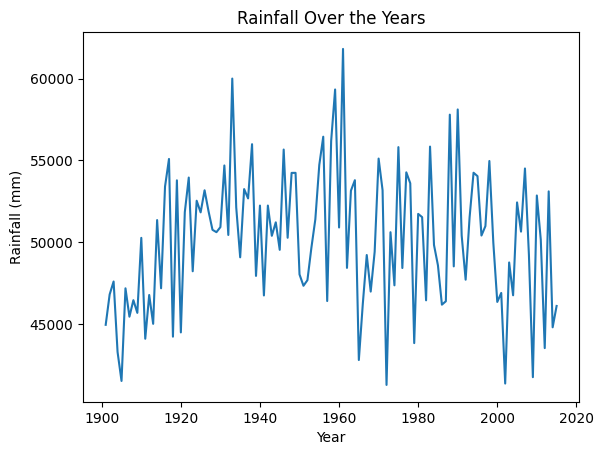

In [ ]:
import statsmodels.api as sm
df = df_aggregated



df['ANNUAL'].plot(title="Rainfall Over the Years", ylabel="Rainfall (mm)", xlabel="Year")
plt.show()


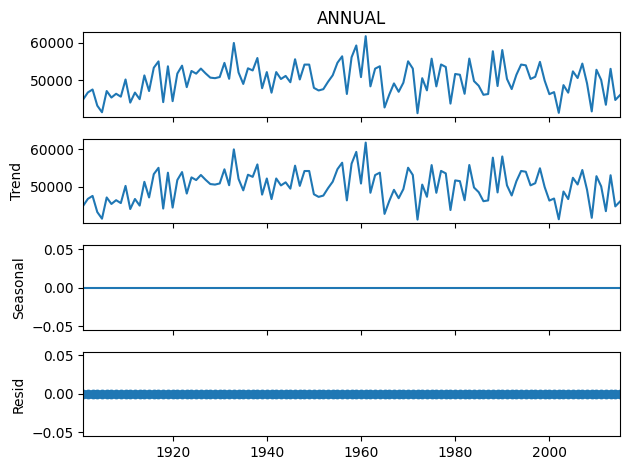

In [ ]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(df['ANNUAL'], period=1, model='additive')  # Set period to 1 since it's yearly data

# Plot the decomposition
decomposition.plot()
plt.show()

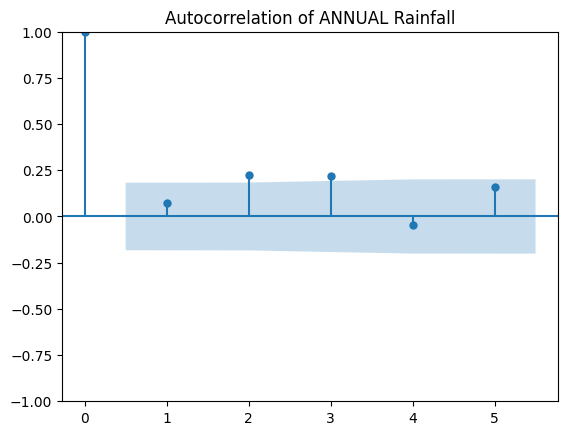

In [ ]:
# Correlation and Autocorrelation analysis
sm.graphics.tsa.plot_acf(df['ANNUAL'], lags=5)
plt.title("Autocorrelation of ANNUAL Rainfall")
plt.show()


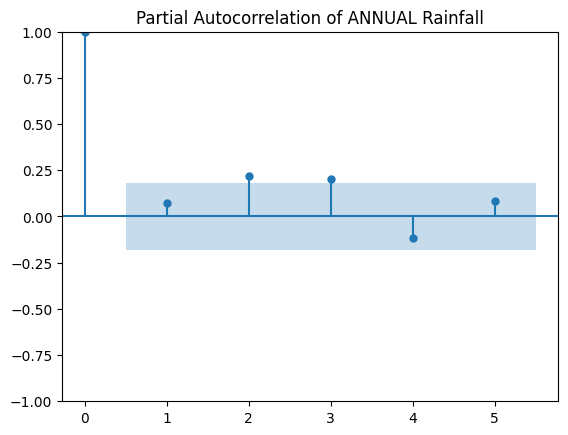

In [ ]:
sm.graphics.tsa.plot_pacf(df['ANNUAL'], lags=5)
plt.title("Partial Autocorrelation of ANNUAL Rainfall")
plt.show()

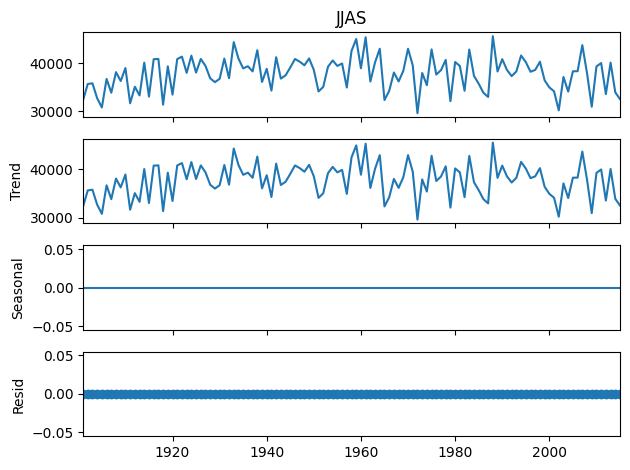

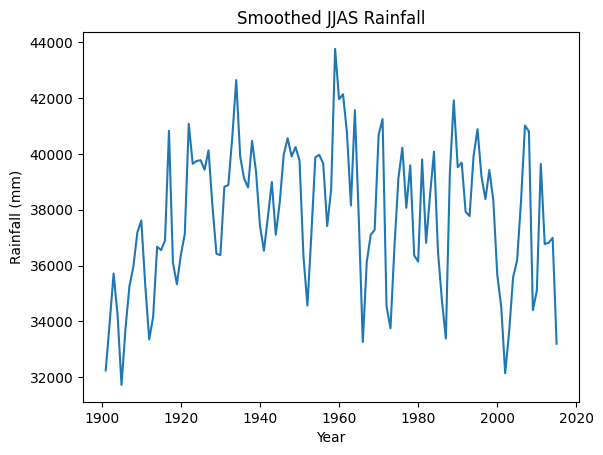

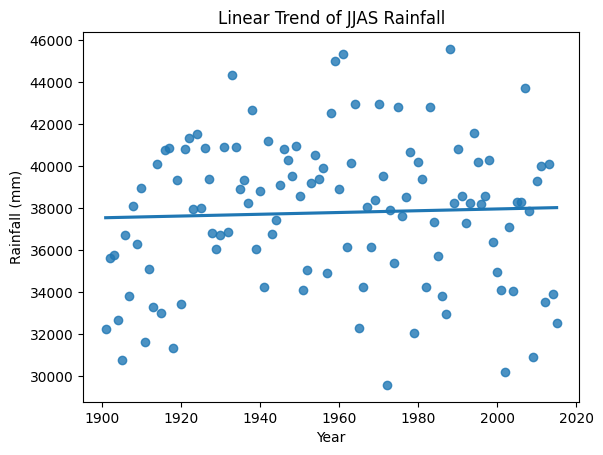

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df['JJAS'], period=1, model='additive')  # Can also use 'multiplicative'

# Plot the decomposition to visualize trends, seasonal effects, and residuals
decomposition.plot()
plt.show()

# Optional: Smoothing the data to reduce noise
df['JJAS_smooth'] = df['JJAS'].rolling(window=2, min_periods=1).mean()  # Simple moving average smoothing

# Plotting the smoothed data to see trends
df['JJAS_smooth'].plot(title="Smoothed JJAS Rainfall", xlabel="Year", ylabel="Rainfall (mm)")
plt.show()

# Optional: Trend analysis
# Fitting a line to see general trend
sns.regplot(x=df.index, y=df['JJAS'], order=1, ci=None)
plt.title("Linear Trend of JJAS Rainfall")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.show()

In [ ]:
df_aggregated

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JJAS,JJAS_smooth
0,1901,1232.7,1417.8,738.4,1623.6,2465.2,6811.3,10192.3,10546.4,4695.4,2579.4,2266.5,378.3,44947.5,32245.7,32245.70
1,1902,298.2,290.7,733.3,1602.0,2521.4,5908.7,12290.1,8393.0,9051.4,3035.0,1521.0,1160.3,46805.6,35643.5,33944.60
2,1903,526.3,407.0,930.2,564.6,2664.2,5807.2,12412.0,10279.9,7289.6,4308.0,1649.8,758.6,47596.9,35788.5,35716.00
3,1904,409.4,328.7,1010.8,1449.1,3235.9,8312.0,10919.0,7595.5,5859.1,2959.3,691.5,517.0,43287.0,32685.6,34237.05
4,1905,812.0,716.7,1432.9,1216.4,2675.3,5768.2,10091.0,8637.3,6274.1,2735.9,560.9,595.2,41516.2,30771.0,31728.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2011,516.3,819.7,998.8,1775.7,2576.2,8679.7,11329.6,11858.1,8128.4,1923.3,1074.9,465.5,50146.4,39996.3,39639.45
111,2012,962.0,336.5,423.0,2019.7,1785.9,5948.2,9877.9,9646.6,8071.1,2643.5,1327.2,483.8,43524.5,33543.3,36769.80
112,2013,435.9,1316.3,629.2,1137.6,2980.9,10707.1,13412.4,9516.2,6452.9,5213.3,986.1,317.5,53106.2,40088.7,36816.00
113,2014,582.5,923.3,1059.9,793.9,3276.5,5121.4,11150.4,10484.1,7141.4,2921.5,760.1,582.0,44796.1,33896.6,36992.65


In [ ]:
df_aggregated.reset_index(inplace=True)

df = df_aggregated[df_aggregated['YEAR'].between(1950,2016)]


In [ ]:
df_1=df_1[df_1['Year'].between(1950,2016)]

In [ ]:
df_2=df_1[df_2['Year'].between(1950,2016)]

<ipython-input-158-0e8667fe78db>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2=df_1[df_2['Year'].between(1950,2016)]


In [ ]:
df_aggregated.drop(columns=['index'],inplace=True)


In [ ]:
df = df_aggregated[df_aggregated['YEAR'].between(1950,2016)]

In [ ]:
df = df.rename(columns={'YEAR': "Year"})

In [ ]:
df

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JJAS,JJAS_smooth
49,1950,840.7,772.4,1038.4,735.2,2231.3,6846.3,14029.0,9270.1,8419.1,2313.5,1086.7,447.9,48030.3,38565.0,39761.95
50,1951,568.6,374.2,1493.2,2284.0,2725.5,8484.1,11910.9,8344.4,5352.4,3582.4,1584.2,630.9,47334.9,34091.4,36328.20
51,1952,334.3,664.0,1338.3,1408.5,3449.2,8353.7,11569.3,10381.1,4741.8,4001.8,621.9,814.3,47677.3,35045.4,34568.40
52,1953,978.3,358.0,702.1,1384.3,1894.9,7539.3,14311.2,10751.4,6610.3,4096.6,727.5,298.9,49653.3,39212.3,37128.85
53,1954,1156.0,1172.1,661.0,1039.3,2631.6,7930.7,13295.9,9982.8,9327.5,3345.0,222.3,632.7,51397.2,40536.7,39874.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2011,516.3,819.7,998.8,1775.7,2576.2,8679.7,11329.6,11858.1,8128.4,1923.3,1074.9,465.5,50146.4,39996.3,39639.45
111,2012,962.0,336.5,423.0,2019.7,1785.9,5948.2,9877.9,9646.6,8071.1,2643.5,1327.2,483.8,43524.5,33543.3,36769.80
112,2013,435.9,1316.3,629.2,1137.6,2980.9,10707.1,13412.4,9516.2,6452.9,5213.3,986.1,317.5,53106.2,40088.7,36816.00
113,2014,582.5,923.3,1059.9,793.9,3276.5,5121.4,11150.4,10484.1,7141.4,2921.5,760.1,582.0,44796.1,33896.6,36992.65


# Merging Datasets with NAO, Niño, and JJAS Columns

This document outlines the steps to merge a North Atlantic Oscillation (NAO) dataset and a Niño dataset with an existing dataset, then add the "JJAS" (June to September rainfall) column from another dataset.


In [ ]:
rename_map = {col: col + "_nao" for col in df_1.columns if col != "Year"}

# Rename the columns
df_1.rename(columns=rename_map, inplace=True)
df_1

<ipython-input-176-8003258aa65b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.rename(columns=rename_map, inplace=True)


,Year,January_nao,February_nao,March_nao,April_nao,May_nao,June_nao,July_nao,August_nao,September_nao,October_nao,November_nao,December_nao
2,1950,24.55,25.06,25.87,26.28,26.18,26.46,26.29,25.88,25.74,25.69,25.47,25.29
3,1951,25.24,25.71,26.90,27.58,27.92,27.73,27.60,27.02,27.23,27.20,27.25,26.91
4,1952,26.67,26.74,27.17,27.80,27.79,27.18,26.53,26.30,26.36,26.26,25.92,26.21
5,1953,26.74,27.00,27.57,28.04,28.28,28.12,27.43,26.94,27.01,26.87,26.88,27.00
6,1954,26.98,27.03,26.90,26.64,27.12,26.80,26.11,25.43,25.12,25.23,25.57,25.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2011,25.00,25.64,26.36,27.05,27.41,27.35,26.87,26.21,25.92,25.67,25.52,25.54
64,2012,25.67,26.08,26.67,27.32,27.61,27.75,27.54,27.32,27.10,26.98,26.86,26.34
65,2013,26.01,26.24,27.03,27.57,27.53,27.30,26.91,26.47,26.54,26.52,26.56,26.43
66,2014,26.05,26.14,27.00,27.90,28.25,27.96,27.23,26.82,27.01,27.16,27.46,27.31


In [ ]:
rename_map = {col: col + "_nino" for col in df_2.columns if col != "Year"}

# Rename the columns
df_2.rename(columns=rename_map, inplace=True)
df_2

,Year,January_nino,February_nino,March_nino,April_nino,May_nino,June_nino,July_nino,August_nino,September_nino,October_nino,November_nino,December_nino
2,1950,24.55,25.06,25.87,26.28,26.18,26.46,26.29,25.88,25.74,25.69,25.47,25.29
3,1951,25.24,25.71,26.90,27.58,27.92,27.73,27.60,27.02,27.23,27.20,27.25,26.91
4,1952,26.67,26.74,27.17,27.80,27.79,27.18,26.53,26.30,26.36,26.26,25.92,26.21
5,1953,26.74,27.00,27.57,28.04,28.28,28.12,27.43,26.94,27.01,26.87,26.88,27.00
6,1954,26.98,27.03,26.90,26.64,27.12,26.80,26.11,25.43,25.12,25.23,25.57,25.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2011,25.00,25.64,26.36,27.05,27.41,27.35,26.87,26.21,25.92,25.67,25.52,25.54
64,2012,25.67,26.08,26.67,27.32,27.61,27.75,27.54,27.32,27.10,26.98,26.86,26.34
65,2013,26.01,26.24,27.03,27.57,27.53,27.30,26.91,26.47,26.54,26.52,26.56,26.43
66,2014,26.05,26.14,27.00,27.90,28.25,27.96,27.23,26.82,27.01,27.16,27.46,27.31


In [ ]:
df_1_2 = pd.merge(df_1, df_2, on="Year", how="inner")  # You can change "inner" to "outer", "left", or "right"


In [ ]:
df_1_2

,Year,January_nao,February_nao,March_nao,April_nao,May_nao,June_nao,July_nao,August_nao,September_nao,...,March_nino,April_nino,May_nino,June_nino,July_nino,August_nino,September_nino,October_nino,November_nino,December_nino
0,1950,24.55,25.06,25.87,26.28,26.18,26.46,26.29,25.88,25.74,...,25.87,26.28,26.18,26.46,26.29,25.88,25.74,25.69,25.47,25.29
1,1951,25.24,25.71,26.90,27.58,27.92,27.73,27.60,27.02,27.23,...,26.90,27.58,27.92,27.73,27.60,27.02,27.23,27.20,27.25,26.91
2,1952,26.67,26.74,27.17,27.80,27.79,27.18,26.53,26.30,26.36,...,27.17,27.80,27.79,27.18,26.53,26.30,26.36,26.26,25.92,26.21
3,1953,26.74,27.00,27.57,28.04,28.28,28.12,27.43,26.94,27.01,...,27.57,28.04,28.28,28.12,27.43,26.94,27.01,26.87,26.88,27.00
4,1954,26.98,27.03,26.90,26.64,27.12,26.80,26.11,25.43,25.12,...,26.90,26.64,27.12,26.80,26.11,25.43,25.12,25.23,25.57,25.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,25.00,25.64,26.36,27.05,27.41,27.35,26.87,26.21,25.92,...,26.36,27.05,27.41,27.35,26.87,26.21,25.92,25.67,25.52,25.54
62,2012,25.67,26.08,26.67,27.32,27.61,27.75,27.54,27.32,27.10,...,26.67,27.32,27.61,27.75,27.54,27.32,27.10,26.98,26.86,26.34
63,2013,26.01,26.24,27.03,27.57,27.53,27.30,26.91,26.47,26.54,...,27.03,27.57,27.53,27.30,26.91,26.47,26.54,26.52,26.56,26.43
64,2014,26.05,26.14,27.00,27.90,28.25,27.96,27.23,26.82,27.01,...,27.00,27.90,28.25,27.96,27.23,26.82,27.01,27.16,27.46,27.31


In [ ]:
df

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JJAS,JJAS_smooth
49,1950,840.7,772.4,1038.4,735.2,2231.3,6846.3,14029.0,9270.1,8419.1,2313.5,1086.7,447.9,48030.3,38565.0,39761.95
50,1951,568.6,374.2,1493.2,2284.0,2725.5,8484.1,11910.9,8344.4,5352.4,3582.4,1584.2,630.9,47334.9,34091.4,36328.20
51,1952,334.3,664.0,1338.3,1408.5,3449.2,8353.7,11569.3,10381.1,4741.8,4001.8,621.9,814.3,47677.3,35045.4,34568.40
52,1953,978.3,358.0,702.1,1384.3,1894.9,7539.3,14311.2,10751.4,6610.3,4096.6,727.5,298.9,49653.3,39212.3,37128.85
53,1954,1156.0,1172.1,661.0,1039.3,2631.6,7930.7,13295.9,9982.8,9327.5,3345.0,222.3,632.7,51397.2,40536.7,39874.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2011,516.3,819.7,998.8,1775.7,2576.2,8679.7,11329.6,11858.1,8128.4,1923.3,1074.9,465.5,50146.4,39996.3,39639.45
111,2012,962.0,336.5,423.0,2019.7,1785.9,5948.2,9877.9,9646.6,8071.1,2643.5,1327.2,483.8,43524.5,33543.3,36769.80
112,2013,435.9,1316.3,629.2,1137.6,2980.9,10707.1,13412.4,9516.2,6452.9,5213.3,986.1,317.5,53106.2,40088.7,36816.00
113,2014,582.5,923.3,1059.9,793.9,3276.5,5121.4,11150.4,10484.1,7141.4,2921.5,760.1,582.0,44796.1,33896.6,36992.65


In [ ]:
df_merged = pd.merge(df_1_2, df[['Year','JJAS']], on="Year", how="inner")

In [ ]:
df_merged

,Year,January_nao,February_nao,March_nao,April_nao,May_nao,June_nao,July_nao,August_nao,September_nao,...,April_nino,May_nino,June_nino,July_nino,August_nino,September_nino,October_nino,November_nino,December_nino,JJAS
0,1950,24.55,25.06,25.87,26.28,26.18,26.46,26.29,25.88,25.74,...,26.28,26.18,26.46,26.29,25.88,25.74,25.69,25.47,25.29,38565.0
1,1951,25.24,25.71,26.90,27.58,27.92,27.73,27.60,27.02,27.23,...,27.58,27.92,27.73,27.60,27.02,27.23,27.20,27.25,26.91,34091.4
2,1952,26.67,26.74,27.17,27.80,27.79,27.18,26.53,26.30,26.36,...,27.80,27.79,27.18,26.53,26.30,26.36,26.26,25.92,26.21,35045.4
3,1953,26.74,27.00,27.57,28.04,28.28,28.12,27.43,26.94,27.01,...,28.04,28.28,28.12,27.43,26.94,27.01,26.87,26.88,27.00,39212.3
4,1954,26.98,27.03,26.90,26.64,27.12,26.80,26.11,25.43,25.12,...,26.64,27.12,26.80,26.11,25.43,25.12,25.23,25.57,25.26,40536.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,25.00,25.64,26.36,27.05,27.41,27.35,26.87,26.21,25.92,...,27.05,27.41,27.35,26.87,26.21,25.92,25.67,25.52,25.54,39996.3
62,2012,25.67,26.08,26.67,27.32,27.61,27.75,27.54,27.32,27.10,...,27.32,27.61,27.75,27.54,27.32,27.10,26.98,26.86,26.34,33543.3
63,2013,26.01,26.24,27.03,27.57,27.53,27.30,26.91,26.47,26.54,...,27.57,27.53,27.30,26.91,26.47,26.54,26.52,26.56,26.43,40088.7
64,2014,26.05,26.14,27.00,27.90,28.25,27.96,27.23,26.82,27.01,...,27.90,28.25,27.96,27.23,26.82,27.01,27.16,27.46,27.31,33896.6


#Selecting a Regression Model:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
##LinearRegression Class from scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Advanced Linear Regression with Gradient Descent
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization=None, lambda_=0):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization = regularization
        self.lambda_ = lambda_
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        # Adding a column of ones for the bias (intercept)
        X = np.insert(X, 0, 1, axis=1)

        # Number of samples (n) and features (m)
        n, m = X.shape

        # Initialize coefficients with zeros
        self.coefficients = np.zeros(m)

        # Gradient descent to minimize the loss function
        for _ in range(self.num_iterations):
            # Predict the output
            y_pred = X.dot(self.coefficients)

            # Calculate the error
            error = y_pred - y

            # Calculate the gradient
            gradient = (1 / n) * X.T.dot(error)

            # Apply regularization if specified
            if self.regularization == "L2":
                gradient[1:] += (self.lambda_ / n) * self.coefficients[1:]  # Exclude the bias
            elif self.regularization == "L1":
                gradient[1:] += (self.lambda_ / n) * np.sign(self.coefficients[1:])  # Lasso penalty

            # Update coefficients
            self.coefficients -= self.learning_rate * gradient

        self.intercept = self.coefficients[0]
        self.coefficients = self.coefficients[1:]

    def predict(self, X):
        # Adding a column of ones for the intercept
        X = np.insert(X, 0, 1, axis=1)
        return X.dot(np.insert(self.coefficients, 0, self.intercept))

In [ ]:
df = df_merged

Just Year And JJAS Forcasting


Mean Squared Error (MSE): 11477000.95328732
Mean Absolute Error (MAE): 2933.426847986893
R-squared: 0.08616419741058612


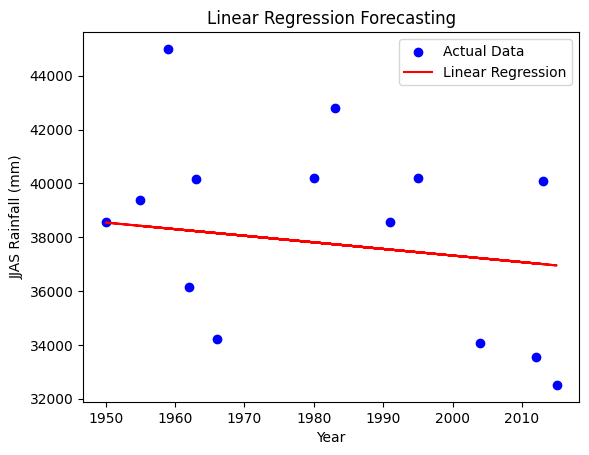

In [ ]:
# Step 1: Split the data into training and test sets (80-20 split)
X = df[["Year"]]  # Independent variable(s)
y = df["JJAS"]  # Dependent variable (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit a linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = linear_regression.predict(X_test)

# Step 4: Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)

# Step 5: Visualize the linear regression and the forecast
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", label="Linear Regression")
plt.title("Linear Regression Forecasting")
plt.xlabel("Year")
plt.ylabel("JJAS Rainfall (mm)")
plt.legend()
plt.show()

All dataset forcating:

Mean Squared Error (MSE): 8391863.224190658
Mean Absolute Error (MAE): 2381.9214656886056
R-squared: 0.3318128058094906


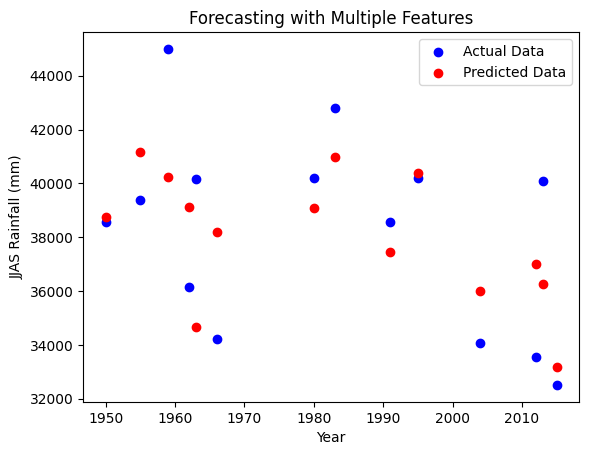

In [ ]:
X = df[[x for x in df.columns.tolist()if x !="JJAS"]]  # Independent variable(s)
y = df["JJAS"]  # Dependent variable (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 2: Fit a multiple linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = linear_regression.predict(X_test)

# Step 4: Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)

# Step 5: Visualize the actual data vs. predicted data
plt.scatter(X_test["Year"], y_test, color="blue", label="Actual Data")
plt.scatter(X_test["Year"], y_pred, color="red", label="Predicted Data")
plt.title("Forecasting with Multiple Features")
plt.xlabel("Year")
plt.ylabel("JJAS Rainfall (mm)")
plt.legend()
plt.show()

# Model Evaluation: Single Feature vs. Multiple Features

This section explores the results of linear regression forecasting using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (coefficient of determination). It compares the performance of models with a single feature versus multiple features.

## Mean Squared Error (MSE)

- **Definition**: MSE measures the average of the squared differences between actual values and predicted values. A lower MSE indicates better model accuracy.
- **Results**:
  - For one feature: 11,477,001
  - For multiple features: 8,391,863
- **Interpretation**: The model with multiple features has a lower MSE, suggesting it's more accurate than the model with just one feature.

## Mean Absolute Error (MAE)

- **Definition**: MAE measures the average of the absolute differences between actual values and predicted values. A lower MAE indicates smaller prediction errors.
- **Results**:
  - For one feature: 2,933
  - For multiple features: 2,382
- **Interpretation**: The lower MAE for the multiple-feature model indicates it has smaller average errors, suggesting greater accuracy.

## R-squared (Coefficient of Determination)

- **Definition**: R-squared indicates the proportion of variance in the target variable explained by the independent variable(s). A higher R-squared value signifies a better fit.
- **Results**:
  - For one feature: 0.086
  - For multiple features: 0.332
- **Interpretation**: The higher R-squared for the model with multiple features suggests it explains more variance, indicating a better fit.

## Conclusion

The results indicate that using multiple features for linear regression forecasting leads to improved performance compared to a single feature. The lower MSE and MAE, along with a higher R-squared, demonstrate that adding more relevant features can lead to greater accuracy and a better fit.


#References:
https://journals.ametsoc.org/view/journals/clim/15/24/1520-0442_2002_015_3645_lpoimr_2.0.co_2.xml
https://www.kaggle.com/datasets/rajanand/rainfall-in-india
https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii.table
https://psl.noaa.gov/data/correlation/nina34.data